# Machine Learning Foundation

## Section 2, Part a: Regression Intro: Transforming Target 


## Learning objectives

By the end of this lesson, you will be able to:

* Apply transformations to make target variable more normally distributed for Regression
* Apply inverse transformations to be able to use these in a Regression context


> Note:The lab is not using Boston Dataset as it has been deprecated by scikit due to ethical issues. More information on this is avaliable at https://scikit-learn.org/1.1/modules/generated/sklearn.datasets.load_boston.html. This lab uses a very similar dataset based on california housing.


In [ ]:
#!pip install -U scikit-learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In the following cells we will load the data and define some useful plotting functions.


In [2]:
np.random.seed(72018)


def to_2d(array):
    return array.reshape(array.shape[0], -1)
    
def plot_exponential_data():
    data = np.exp(np.random.normal(size=1000))
    plt.hist(data)
    plt.show()
    return data
    
def plot_square_normal_data():
    data = np.square(np.random.normal(loc=5, size=1000))
    plt.hist(data)
    plt.show()
    return data

### Loading the California Housing Data


In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(download_if_missing=True)

data = np.c_[housing.data, housing.target]
columns = np.append(housing.feature_names, ["MedVal"])
housing_df = pd.DataFrame(data, columns=columns)

In [4]:
housing_df.head(15)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


### Determining Normality


Making our target variable normally distributed often will lead to better results

If our target is not normally distributed, we can apply a transformation to it and then fit our regression to predict the transformed values.

How can we tell if our target is normally distributed? There are two ways:

* Using a Visual approach
* Using a Statistical Test


#### Using a Visual approach


#### Plotting a histogram:


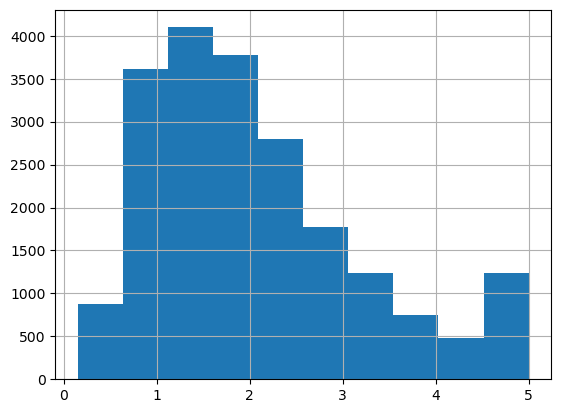

In [5]:
housing_df.MedVal.hist();

The histogram does not look normal due to its right tail.


#### Using a Statistical Test


Without getting into Bayesian vs. frequentist debates, for the purposes of this lesson, the following will suffice:

* This is a statistical test that tests whether a distribution is normally distributed or not. It isn't perfect, but suffice it to say: 
    * This test outputs a **p-value**. The _higher_ this p-value is the _closer_ the distribution is to normal.
    * Frequentist statisticians would say that you accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.


In [6]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

In [7]:
normaltest(housing_df.MedVal.values)

NormaltestResult(statistic=2430.931051066072, pvalue=0.0)

p-value is _extremely_ low. Our **y** variable which we have been dealing with this whole time was not normally distributed!


### Apply transformations to make target variable more normally distributed for Regression


Linear Regression assumes a normally distributed residuals which can be aided by transforming **y** variable which is the target variable. Let's try some common transformations to try and get **y** to be normally distributed: 

* Log Transformation
* Square root Transformation
* Box cox Transformation


### Log Transformation


The log transformation can transform data that is significantly skewed right to be more normally distributed:


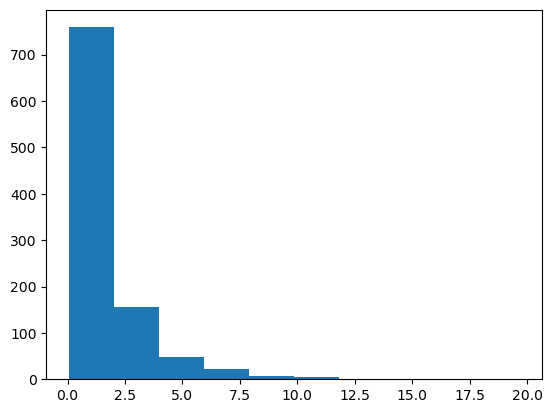

In [8]:
data = plot_exponential_data()

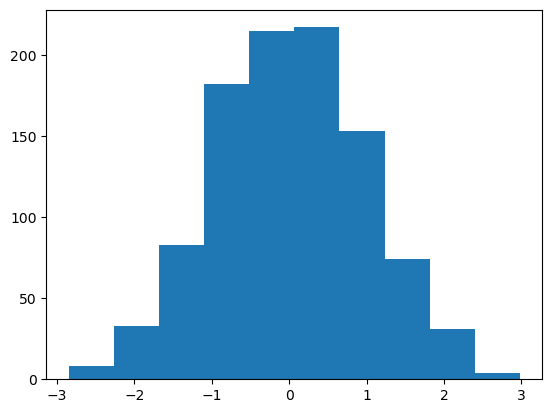

In [9]:
plt.hist(np.log(data));

**Apply transformation to California Housing data:**


In [10]:
log_medv = np.log(housing_df.MedVal)

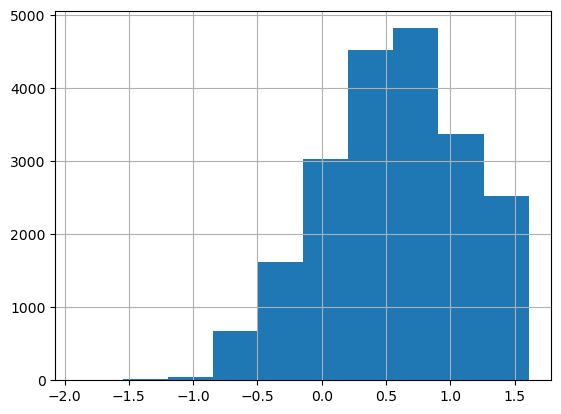

In [11]:
log_medv.hist();

In [12]:
normaltest(log_medv)

NormaltestResult(statistic=359.5441835709388, pvalue=8.432814311328483e-79)

Conclusion: The output is closer to normal distribution, but still not completely normal.


### Square root Transformation

The square root transformation is another transformation that can transform non-normally distributed data into normally distributed data:


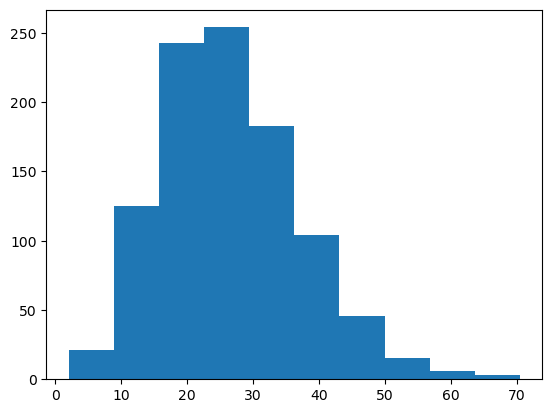

In [13]:
data = plot_square_normal_data()

You may notice that the output still exhibits a slight right skew.


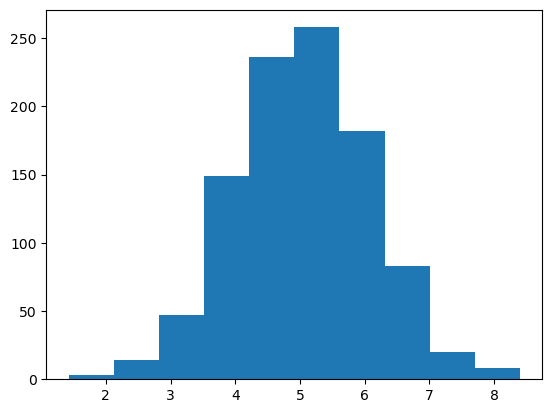

In [14]:
plt.hist(np.sqrt(data));

#### Exercise


Apply the square root transformation to the California Housing data target and test whether the result is normally distributed.


<Axes: >

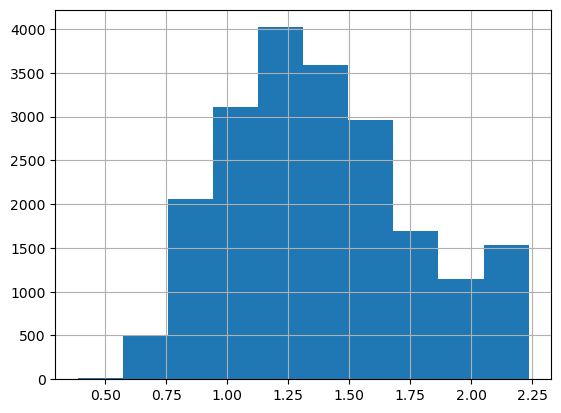

In [15]:
## Enter your code here
sqrt_medv = np.sqrt(housing_df.MedVal)
sqrt_medv.hist()

Click <b>here</b> for the solution.

<!-- The answer is below:

sqrt_medv = np.sqrt(housing_df.MedVal)
plt.hist(sqrt_medv)
-->


In [16]:
normaltest(sqrt_medv)

NormaltestResult(statistic=851.8425227299578, pvalue=1.0586355256007262e-185)

### Box cox Transformation


The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

It is defined as:

$$ \text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda} $$

You can think of as a generalization of the square root function: the square root function uses the exponent of 0.5, but box cox lets its exponent vary so it can find the best one.


In [17]:
from scipy.stats import boxcox

In [18]:
bc_result = boxcox(housing_df.MedVal)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [19]:
lam

0.12474766353082614

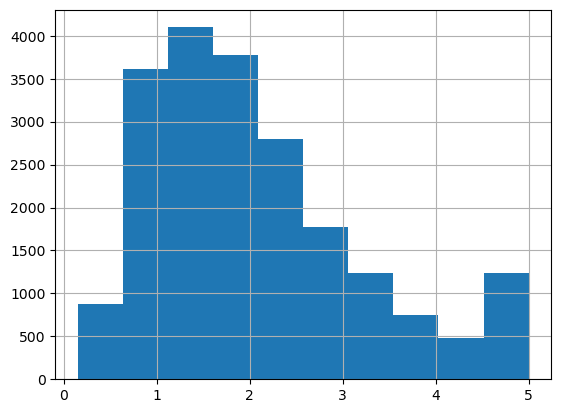

In [20]:
housing_df['MedVal'].hist();

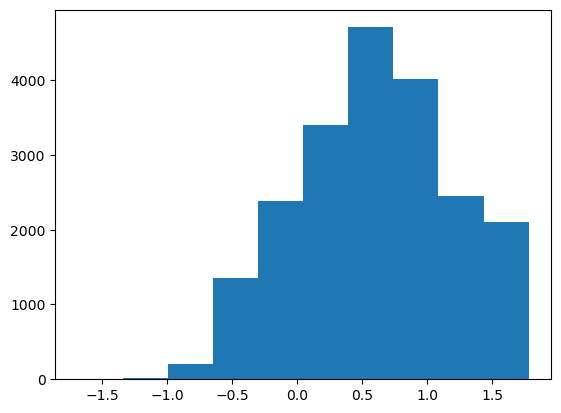

In [21]:
plt.hist(boxcox_medv);

In [22]:
normaltest(boxcox_medv)

NormaltestResult(statistic=446.7475200170056, pvalue=9.772566318644954e-98)

We find that the box cox results in a graph which is significantly more normally distributed (according to p value) than the other two distributions.This can be even above 0.05.

Now that we have a normally distributed y-variable, let's test Regression using this transformed target variables.


### Testing regression:


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [24]:
lr = LinearRegression()

**Load the dataframe `housing_df`:**


In [25]:
data = np.c_[housing.data, housing.target]
columns = np.append(housing.feature_names, ["MedVal"])
housing_df = pd.DataFrame(data, columns=columns)

**Define and load the predictor (X) and Target(y) variables **


In [26]:
y_col = "MedVal"

X = housing_df.drop(y_col, axis=1)
y = housing_df[y_col]

**Create Polynomial Features**


In [27]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

**Split the data into Training and Test Sets**   

The split ratio here is 0.7 and 0.3 which means we will assign **70%** data for training and **30%** data for testing


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=72018)

**Normalize the training data using `StandardScaler` on `X_train`. Use fit_transform() function**


In [29]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

**Discuss: what transformation do we need to apply next?**

Apply the appropriate transformation.


In [30]:
# Enter your code here
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

Click <b>here</b> for the solution.

<!-- The answer is below:

bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]
-->


As before, we'll now:

1. Fit regression
1. Transform testing data
1. Predict on testing data


In [31]:
y_train_bc.shape

(14448,)

In [32]:
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

### Discussion

* Are we done?
* What did we predict?
* How would you interpret these predictions?


#### Apply inverse transformations to be able to use these in a Regression context


Every transformation has an inverse transformation. The inverse transformation of $f(x) = \sqrt{x}$ is $f^{-1}(x) = x^2$, for example. Box cox has an inverse transformation as well: notice that we have to pass in the lambda value that we found from before:


In [33]:
from scipy.special import inv_boxcox

In [34]:
# code from above
bc_result = boxcox(housing_df.MedVal)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [35]:
inv_boxcox(boxcox_medv, lam)[:10]

array([4.526, 3.585, 3.521, 3.413, 3.422, 2.697, 2.992, 2.414, 2.267,
       2.611])

In [36]:
housing_df['MedVal'].values[:10]

array([4.526, 3.585, 3.521, 3.413, 3.422, 2.697, 2.992, 2.414, 2.267,
       2.611])

Exactly the same, as we would hope!


### Exercise:

1. Apply the appropriate inverse transformation to `y_pred_bc`.
2. Calculate the $R^2$ using the result of this inverse transformation and `y_test`.  

**Hint:** Use the **inv_boxcox()** function to get the transformed predicted values


In [37]:
#Enter your code here
y_pred_tran = inv_boxcox(y_pred_bc, lam2)
r2_score(y_pred_tran, y_test)

0.025873646916521054

Click <b>here</b> for the solution.

<!-- The answer is below:

y_pred_tran = inv_boxcox(y_pred_bc,lam2)
r2_score(y_pred_tran,y_test)
-->


## Practice Exercise: 

### Determine the R^2 of a LinearRegression without the box cox transformation.


In [40]:
# Enter your code here
lr = LinearRegression()
lr.fit(X_train_s, y_train)
lr_pred = lr.predict(X_test_s)
r2_score(lr_pred,y_test)

0.48718235559773015

: 

Click <b>here</b> for the solution.

<!-- The answer is below:

lr = LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred = lr.predict(X_test_s)
r2_score(lr_pred,y_test)
-->


---
### Machine Learning Foundation (C) 2023 IBM Corporation
